In [8]:
!pip install tweepy==4.10.1 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: tweepy
    Found existing installation: tweepy 4.13.0
    Uninstalling tweepy-4.13.0:
      Successfully uninstalled tweepy-4.13.0


In [9]:
!pip show tweepy

Name: tweepy
Version: 4.10.1
Summary: Twitter library for Python
Home-page: https://www.tweepy.org/
Author: Joshua Roesslein
Author-email: tweepy@googlegroups.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: oauthlib, requests, requests-oauthlib
Required-by: 


In [10]:
import os
import tweepy
import pandas as pd

In [11]:
#keys to access the twitter API
consumer_key= 'Y3RJeJFRHnA9QnpZu8z9S0Skb'
consumer_secret= 'mSHz1KdYkTNmYWuxMwX4fMzzGc9qv1OqgyQxWU26pheoGRcLuE'
access_token= '1287803472805367808-EedGVpYxgeXKILni2gt9HvJacgsmxx'
access_token_secret= 'K9jXNXr6i72odGz9XAiUnN5841eIUiDKcrj52RozRO743'

In [12]:
#Code to access the api and authentication to connect to twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [13]:
#code to search the Tweets with keyword Google and add them to a text file
word = 'Google'
lmt=1000
tweets_google = tweepy.Cursor(api.search_tweets, q=word, tweet_mode='extended').items(lmt)
file = open('twitter.txt', 'w', encoding="utf-8")
for tweet in tweets_google:
    file.write(tweet.full_text+'\n')
file.close()

In [14]:
#code to search the Tweets with keyword #HeyGoogle and add them to a text file
word = '#HeyGoogle'
lmt=1000
tweets_heygoogle = tweepy.Cursor(api.search_tweets, q=word, tweet_mode='extended').items(lmt)
file = open('twitter.txt', 'a', encoding="utf-8")
for tweet in tweets_heygoogle:
    file.write(tweet.full_text+'\n')
file.close()

In [15]:
#code to search the Tweets with keywords Google and Chrome and add them to a text file
words = 'Google and Chrome'
lmt=1000
tweets_googlechrome = tweepy.Cursor(api.search_tweets, q=word, tweet_mode='extended').items(lmt)
file = open('twitter.txt', 'a', encoding="utf-8")
for tweet in tweets_googlechrome:
    file.write(tweet.full_text+'\n')
file.close()

In [16]:
#opening file to write the processed text
file = open('processed.txt', 'w', encoding="utf-8")

In [17]:
#preprocessing
import re
with open('twitter.txt','r', encoding="utf-8") as fl:
    lines = fl.readlines()
fl.close()
for line in lines:
    content=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", line).split())
    file.write(content+'.'+'\n')
file.close()

In [18]:
#Converting the input file into the list of sentences. 
Input_data = open("processed.txt", "r")
data = Input_data.read()
Input_data_to_list = data.split("\n")
Input_data.close()

In [19]:
#Adding the input text that needs to be classified to the TEST variable
Test_Data_X=[]
for x in Input_data_to_list:
    Test_Data_X.append(x)
Test_Data_X

['RT kaitori Google.',
 'ROLEX.',
 'ROLEX.',
 'On A I It s another major revolution like the Industrial Revolution the telegraph the automobile and oil the internet.',
 '.',
 'The difference is this one will happen faster than any of the others Google to Smartphone was only 15 years.',
 '.',
 'A I Will disrupt 1 10 to 1 8 jobs.',
 'RT JAM PLANET VOTING NOTICE.',
 '.',
 'Time to drop your DAILY VOTES using all your accounts google or facebook.',
 '.',
 'Don t let an.',
 'Sean checked the maximum mortgage available on 32 Rates for 237 000 over 25 years.',
 'RT Systems Demo is here and hopefully your PC don t catch on fire.',
 '.',
 'IndieGameDev indiedev animation Unr.',
 'RT.',
 '.',
 'JO1.',
 'RT Capacitaciones gratuitas en Biotecnolog a es hora de comprender m s y temer menos.',
 '.',
 'Arrancamos en mayo Y est s a ti.',
 'RT MOAference IS COMING SOON.',
 '.',
 'join us in our annual monthly discussion as usual we will be answering your questions and.',
 'RT breky Total Orders This Wk

In [20]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [21]:
#removing the stopwords and peroforming the lemmatization and appending back.
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
Test_data=[]
for x in Test_Data_X:
    tokens = word_tokenize(str(x))
    tokens_final = [w for w in tokens if w not in stopwords]
    Lemmword = WordNetLemmatizer()
    wordsfinal=[]
    for w in tokens_final:
        if len(w)>1:
            word = Lemmword.lemmatize(w)
            wordsfinal.append(word)
    Test_data.append(' '.join(wordsfinal))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
#Removing duplicate and single word sentences.
Test_Data_X=[]
for x in Test_data:
    if len(x)>10:
        Test_Data_X.append(x)
Test_Data_X = [*set(Test_Data_X)]

In the below 2 cells\, read the input from 2 different sets that are related to the stock sentiment to train the model.

In [23]:
from google.colab import drive
drive.mount('/content/drive/')



Mounted at /content/drive/


In [24]:
twt = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/all-data.csv", encoding = "latin-1")
Train_Data_Y=twt["Sentiment"]
Train_Data_X=twt["Text"]

In [25]:
twt = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/stock_data.csv", encoding = "latin-1")
for ind in twt.index:
    if(twt['Sentiment'][ind]==-1):
        twt['Sentiment'][ind]="negative"
    else:
        twt['Sentiment'][ind]="positive"

<ipython-input-25-cd2eb43c952e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twt['Sentiment'][ind]="positive"


In [26]:
Train_Data_X=Train_Data_X.append(twt["Text"])
Train_Data_Y=Train_Data_Y.append(twt["Sentiment"])

<ipython-input-26-5d0ab53b7eae>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Train_Data_X=Train_Data_X.append(twt["Text"])
<ipython-input-26-5d0ab53b7eae>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Train_Data_Y=Train_Data_Y.append(twt["Sentiment"])


In [27]:
Train_Data_X.shape

(10637,)

In [28]:
#cleaned the train data by removing the stop words and doing the lemmatization
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
Train_data=[]
for x in Train_Data_X:
    tokens = word_tokenize(str(x))
    tokens_final = [w for w in tokens if w not in stopwords]
    Lemmword = WordNetLemmatizer()
    wordsfinal=[]
    for w in tokens_final:
        if len(w)>1:
            word = Lemmword.lemmatize(w)
            wordsfinal.append(word)
    Train_data.append(' '.join(wordsfinal))
Train_Data_X= Train_data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
#converted the list to Pandas data frame for analysis
dataframe = pd.DataFrame(list(zip(Train_Data_X, Train_Data_Y)),
               columns =['Text', 'Sentiment'])

In [30]:
#created the wordcloud method to display the words with the sentiment values
from wordcloud import WordCloud 
from matplotlib import pyplot as plt

def DisplayWordCloud(input,b_col):
    plt.figure(figsize=(10,10))
    wordcl=WordCloud(background_color=b_col,max_words=50, min_word_length=2, contour_width=1, contour_color='orange')
    wordcl.generate(" ".join(input)) 
    plt.imshow(wordcl)
    plt.axis("off")

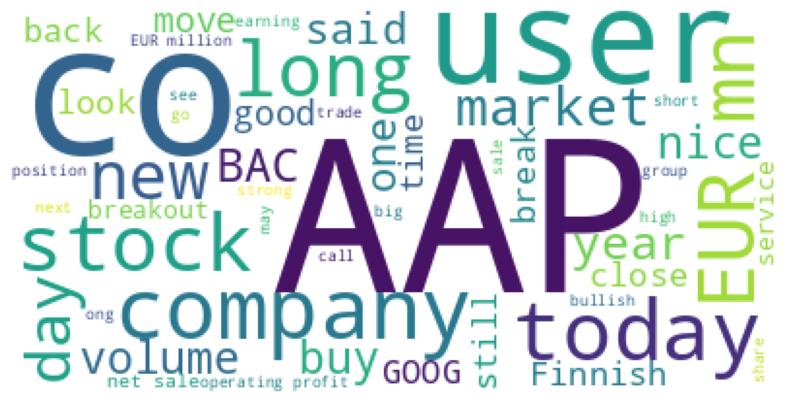

In [31]:
DisplayWordCloud(dataframe[dataframe.Sentiment=="positive"].Text, 'white')

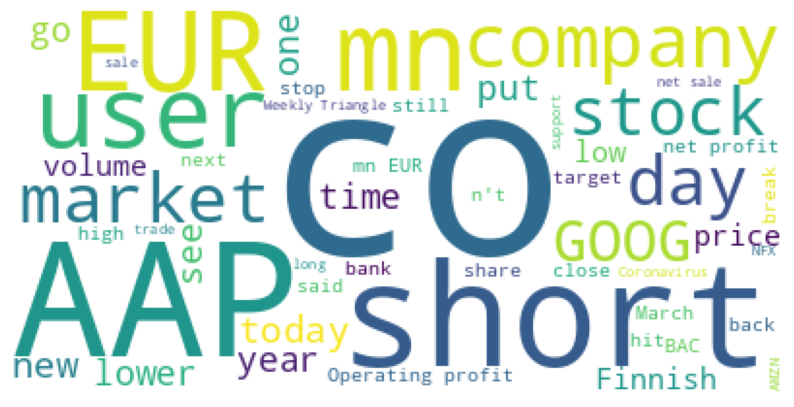

In [32]:
DisplayWordCloud(dataframe[dataframe.Sentiment=="negative"].Text, 'white')

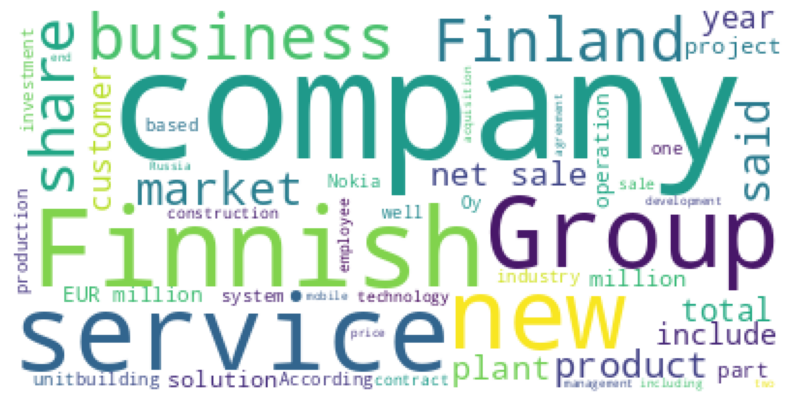

In [33]:
DisplayWordCloud(dataframe[dataframe.Sentiment=="neutral"].Text, 'white')

In [34]:
#creating a pipeline withe Tf-IDF vector and multinomailNaive bayes classifier as we have positive, negative and Neutral sentiment.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [35]:
#model is trained using FIt method
model.fit(Train_Data_X, Train_Data_Y)
labels = model.predict(Test_Data_X)

In [36]:
#lables for the input are counted based on the sentiment
lables_Final=labels.tolist()
positivecount=lables_Final.count("positive")
negativecount=lables_Final.count("negative")
neutralcount=lables_Final.count("neutral")
positivecount,negativecount,neutralcount

(1065, 37, 72)

Building a sentiment model to pass the above labelled twitter data to predict the sentiment of the tweets and then deciding the stock direction where it is bearish or bullish based on the predicted tweets. Also comparing the above labels with the predicted sentiment in the below model gives the accuracy of the model.

In [37]:
import nltk
import numpy as np
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier 
from nltk.corpus import twitter_samples 
from nltk.corpus import stopwords 
from nltk.corpus import wordnet 
import pandas as pd

In [38]:
#nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/stock_twitter.csv",encoding='latin-1',sep=',')

In [40]:
dataframe.head(2)

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,positive
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,positive


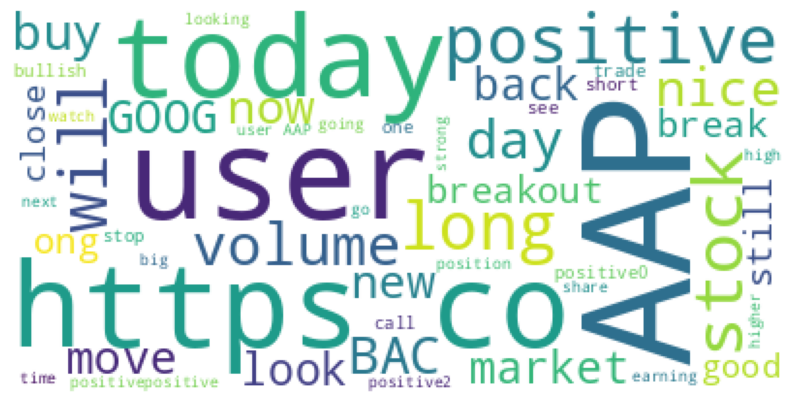

In [41]:
DisplayWordCloud(dataframe[dataframe.Sentiment=="positive"].Text, 'white')

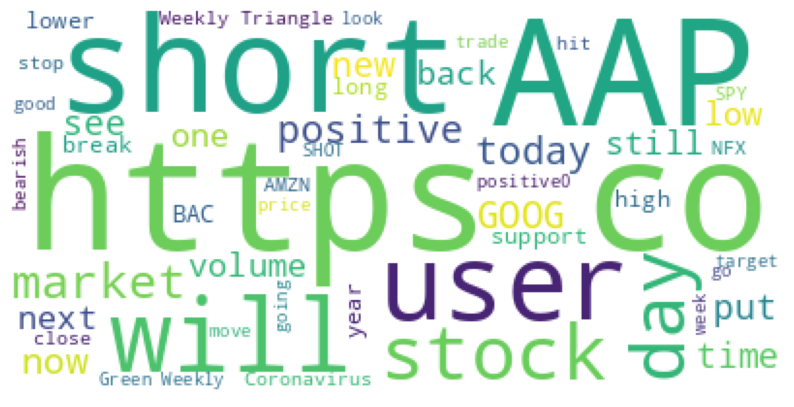

In [42]:
DisplayWordCloud(dataframe[dataframe.Sentiment=="negative"].Text, 'white')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Axes: >

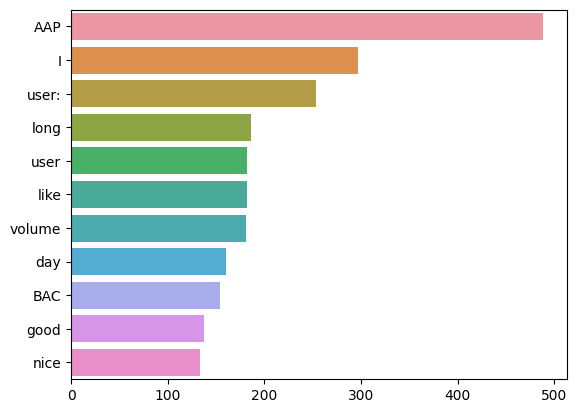

In [46]:
#most common words in the positive dataset text
from collections import Counter
import nltk
import seaborn as sns

nltk.download('stopwords')
stopword=set(stopwords.words('english'))
Input_str=[]
for line in pos_tweets['Text']:
    wordlist= line.split()
    for word in wordlist:
      Input_str.append(word)
count=Counter(Input_str)
common=count.most_common()
x, y= [], []
sym = {'~', ':', "'", '+', '[', '\\', '@', '^', '{', '%', '(', '-', '"', '*', '|', ',', '&', '<', '`', '}', '.', '_', '=', ']', '!', '>', ';', '?', '#', '$', ')', '/'}
for word,count in common[:40]:
    if (word not in stopword):
      if(word not in sym):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

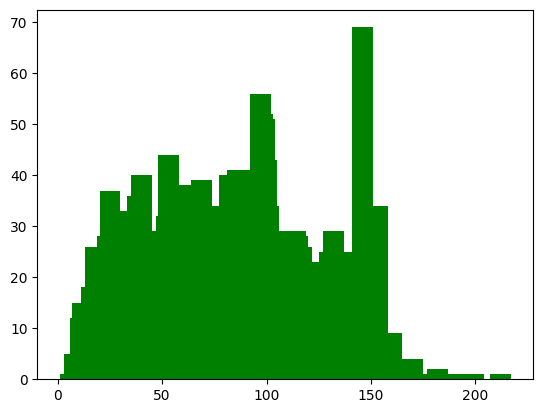

In [47]:
pos_tweets = dataframe.loc[dataframe['Sentiment']=='positive']
pos_tweets['Text']
#frequency of length of sentences in the positive text of dataset
from collections import OrderedDict
frequency = {}
for line in pos_tweets['Text']:
  l=len(line)
  if (l in frequency):
    frequency[l] += 1
  else:
    frequency[l] = 1
dict_final = OrderedDict(sorted(frequency.items()))
plt.bar(dict_final.keys(), dict_final.values(), 10, color='g')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Axes: >

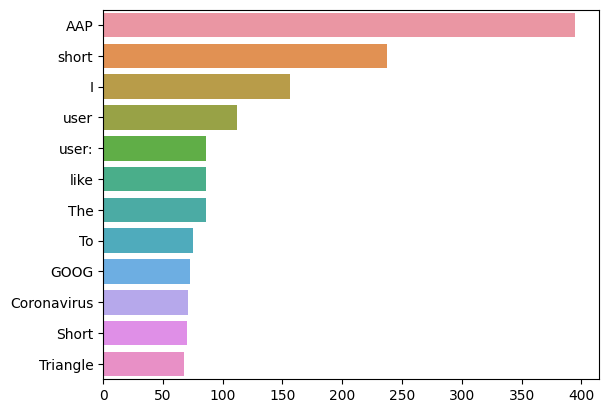

In [50]:
#most common words in the negative dataset text
from collections import Counter
import nltk
import seaborn as sns

nltk.download('stopwords')
stopword=set(stopwords.words('english'))
Input_str=[]
for line in neg_tweets['Text']:
    wordlist= line.split()
    for word in wordlist:
      Input_str.append(word)
count=Counter(Input_str)
common=count.most_common()
x, y= [], []
sym = {'~', ':', "'", '+', '[', '\\', '@', '^', '{', '%', '(', '-', '"', '*', '|', ',', '&', '<', '`', '}', '.', '_', '=', ']', '!', '>', ';', '?', '#', '$', ')', '/'}
for word,count in common[:40]:
    if (word not in stopword):
      if(word not in sym):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

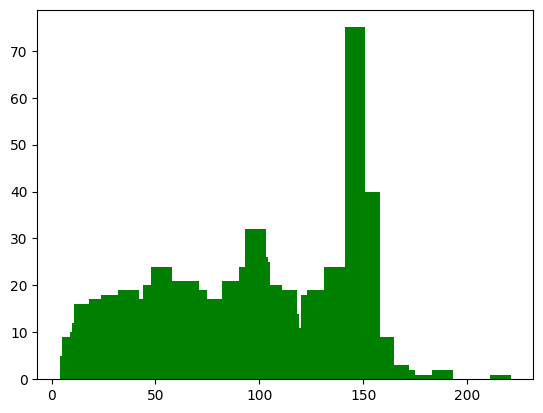

In [51]:
neg_tweets = dataframe.loc[dataframe['Sentiment']=='negative']
neg_tweets['Text']
#frequency of length of sentences in the negative text of dataset
from collections import OrderedDict
frequency = {}
for line in neg_tweets['Text']:
  l=len(line)
  if (l in frequency):
    frequency[l] += 1
  else:
    frequency[l] = 1
dict_final = OrderedDict(sorted(frequency.items()))
plt.bar(dict_final.keys(), dict_final.values(), 10, color='g')
plt.show()


In [44]:
#cleaning the dataset
import re
import string
import numpy as np

from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

def process_tweet(tweet):
  
  # remove the hyperlinks
  tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

  # remove the # symbol
  tweet = re.sub(r'#', '', tweet)

  tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
  tweet_tokens = tokenizer.tokenize(tweet)
  tweet_clean = []

  return tweet_tokens

In [45]:
#counting the frequency
def count_tweets(tweets, s):
  tweet_list = np.squeeze(s).tolist()
  frequency ={}

  for y, tweet in zip(tweet_list, tweets):
    for word in process_tweet(tweet):
      pair = (word, y)
      if pair in frequency:
        frequency[pair] +=1
      else:
        frequency[pair] = 1
  
  return frequency

In [46]:
def lookup(frequency, word, label):
  n = 0
  pair = (word, label)
  if pair in frequency:
    n = frequency[pair]
  return n 

In [47]:
# splitting the data for training and testing 
training_data_pos = pos_tweets.sample(frac=0.8, random_state=25)
testing_data_pos = pos_tweets.drop(training_data_pos.index)

training_data_neg = neg_tweets.sample(frac=0.8, random_state=25)
testing_data_neg = neg_tweets.drop(training_data_neg.index)

train_data_x = training_data_pos.append(training_data_neg)
test_data_x = testing_data_pos.append(testing_data_neg)

# numpy array for the labels in the training set
train_data_y = np.append(np.ones((len(training_data_pos))), np.zeros((len(training_data_neg))))
test_data_y = np.append(np.ones((len(testing_data_neg))), np.zeros((len(testing_data_neg))))

<ipython-input-47-f4cbaabd8af7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_data_x = training_data_pos.append(training_data_neg)
<ipython-input-47-f4cbaabd8af7>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_data_x = testing_data_pos.append(testing_data_neg)


In [48]:
# Build a frequency dictionary
frequency = count_tweets(train_data_x["Text"], train_data_y)

def train_naive_bayes(frequency, train_data_x, train_data_y):
  logliklihood = {}
  logprior = 0

  vocab = set([pair[0] for pair in frequency.keys()])
  V = len(vocab)


  N_pos = N_neg = V_pos = V_neg = 0
  for pair in frequency.keys():
    if pair[1]>0:
      V_pos +=1
      N_pos += frequency[pair]
    else:
      V_neg +=1
      N_neg += frequency[pair]

  # Number of Documents (tweets)
  D = len(train_data_y)

  # D_pos, number of positive documnets
  D_pos = len(list(filter(lambda x: x>0, train_data_y)))

  # D_pos, number of negative documnets
  D_neg = len(list(filter(lambda x: x<=0, train_data_y)))

  # calculate the logprior
  logprior = np.log(D_pos) - np.log(D_neg)

  for word in vocab:
    freqs_pos = lookup(frequency, word, 1)
    freqs_neg = lookup(frequency, word, 0)

    # calculte the probability of each word being positive and negative
    p_w_pos = (freqs_pos+1)/(N_pos+V)
    p_w_neg = (freqs_neg+1)/(N_neg+V)

    logliklihood[word] = np.log(p_w_pos/p_w_neg)
  
  return logprior, logliklihood

In [49]:
logprior, loglikelihood = train_naive_bayes(frequency, train_data_x, train_data_y)
print(logprior)
print(len(loglikelihood))

0.5593614105227651
9256


In [50]:
def naive_bayes_predict(tweet, logprior, loglikelihood):
  word_l = process_tweet(tweet)
  p = 0
  p+=logprior

  for word in word_l:
    if word in loglikelihood:
      p+=loglikelihood[word]

  return p

Accuracy of model:38.19444444444444 %


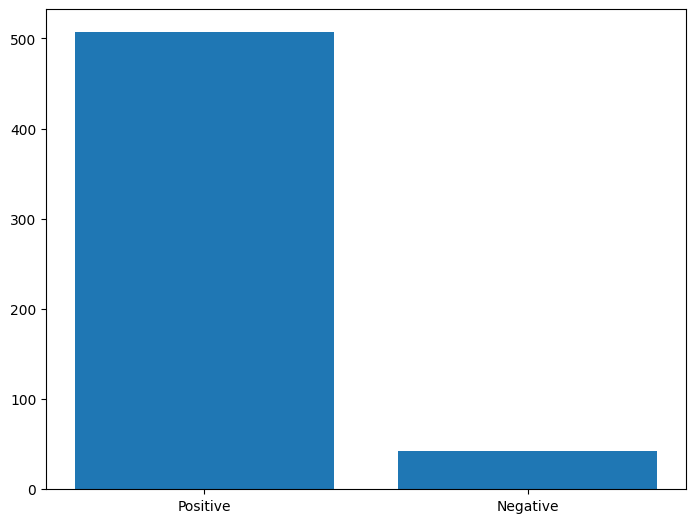

In [51]:
tweets=Test_Data_X
pos=0
neg=0
lables_final=labels.tolist()
positivecount=lables_final.count("positive")
negativecount=lables_final.count("negative")
for tweet,label  in zip(tweets,labels):
  pre=naive_bayes_predict(tweet,logprior,loglikelihood)
  if(pre>1):
    if(label=="positive"):
      pos=pos+1
  else:
    if(label=="negative"):
      neg=neg+1
acc= ((neg+pos)/(positivecount+negativecount)) * 100
print("Accuracy of model:"+str(acc)+" %")
#plotted a bar chart for the lables that are predicted for the input.
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Sentiment = ['Positive', 'Negative']
Count = [pos,neg]
ax.bar(Sentiment,Count)
plt.show()